In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from main import *

In [ ]:
# import_csv_files('https://drive.google.com/drive/folders/1-LvC0gGGH4C1rV0YVPOfuHlDb4awlf7G?usp=sharing')

In [2]:
sql_file_path = 'queries/1_job_comparison.sql'

In [3]:
queries = read_sql_file(sql_file_path)
connection = connect_to_database()

if connection:
    tables = execute_queries(connection, queries)
    connection.close()

All queries executed successfully!


In [4]:
tables[0].loc[5,'job_title_short'] = 'ML Engineer'
tables[0].sort_values('job_count', ascending=False)

,job_title_short,job_count,avg_salary
4,Data Scientist,7612,139943
2,Data Analyst,6595,97348
3,Data Engineer,6103,134341
0,Business Analyst,617,91071
5,ML Engineer,573,126786
6,Software Engineer,469,112778
1,Cloud Engineer,65,111268


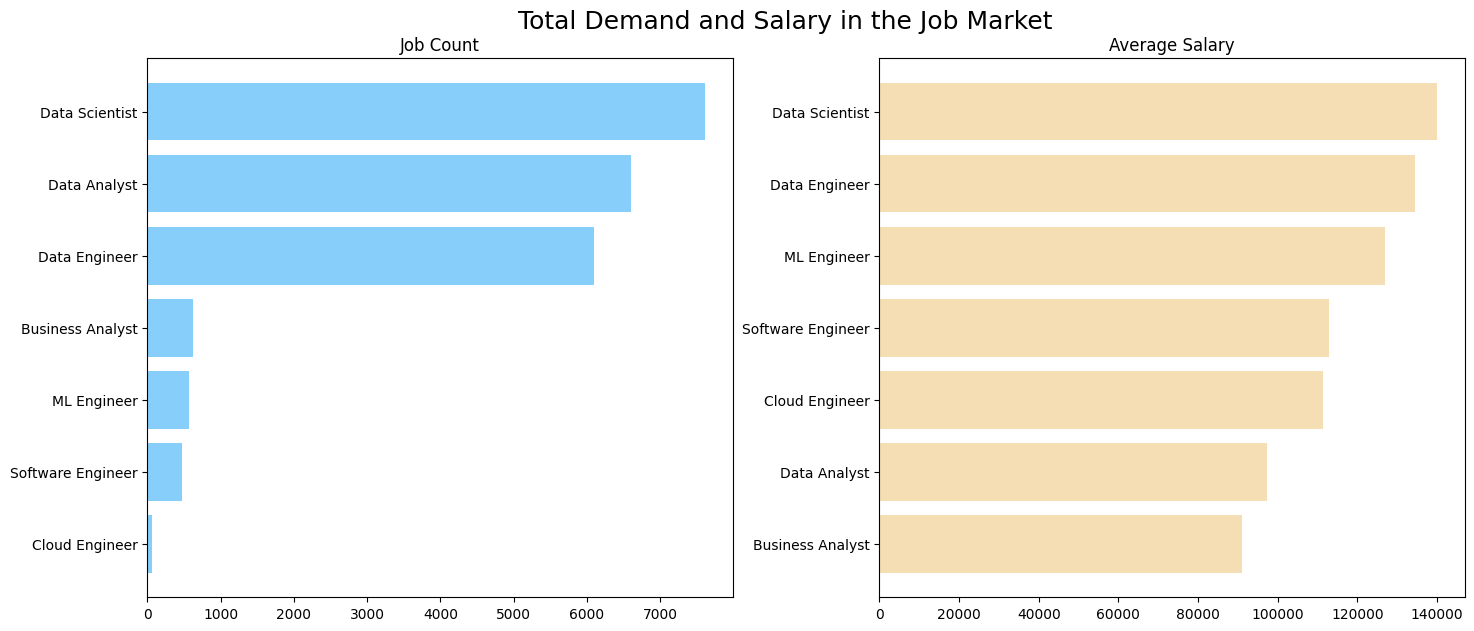

In [5]:
# sorting the tables
job_table_sorted_count = tables[0].sort_values('job_count', ascending=True)
job_table_sorted_salary = tables[0].sort_values('avg_salary', ascending=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
plt.subplots_adjust(wspace=0.25)  # adjusting the horizontal space between subplots
fig.suptitle('Total Demand and Salary in the Job Market', fontsize=18, y=0.95)

# plotting the data job market by job count
axs[0].barh('job_title_short', 'job_count', data=job_table_sorted_count, color='lightskyblue')
axs[0].set_title('Job Count')

# plotting the data job market by average salary
axs[1].barh('job_title_short', 'avg_salary', data=job_table_sorted_salary, color='wheat')
axs[1].set_title('Average Salary')

plt.show()

In [14]:
# tables
table_data_engineer_demand = tables[1].sort_values('job_count', ascending=True)
table_data_scientist_demand = tables[2].sort_values('job_count', ascending=True)
table_data_analyst_demand = tables[3].sort_values('job_count', ascending=True)

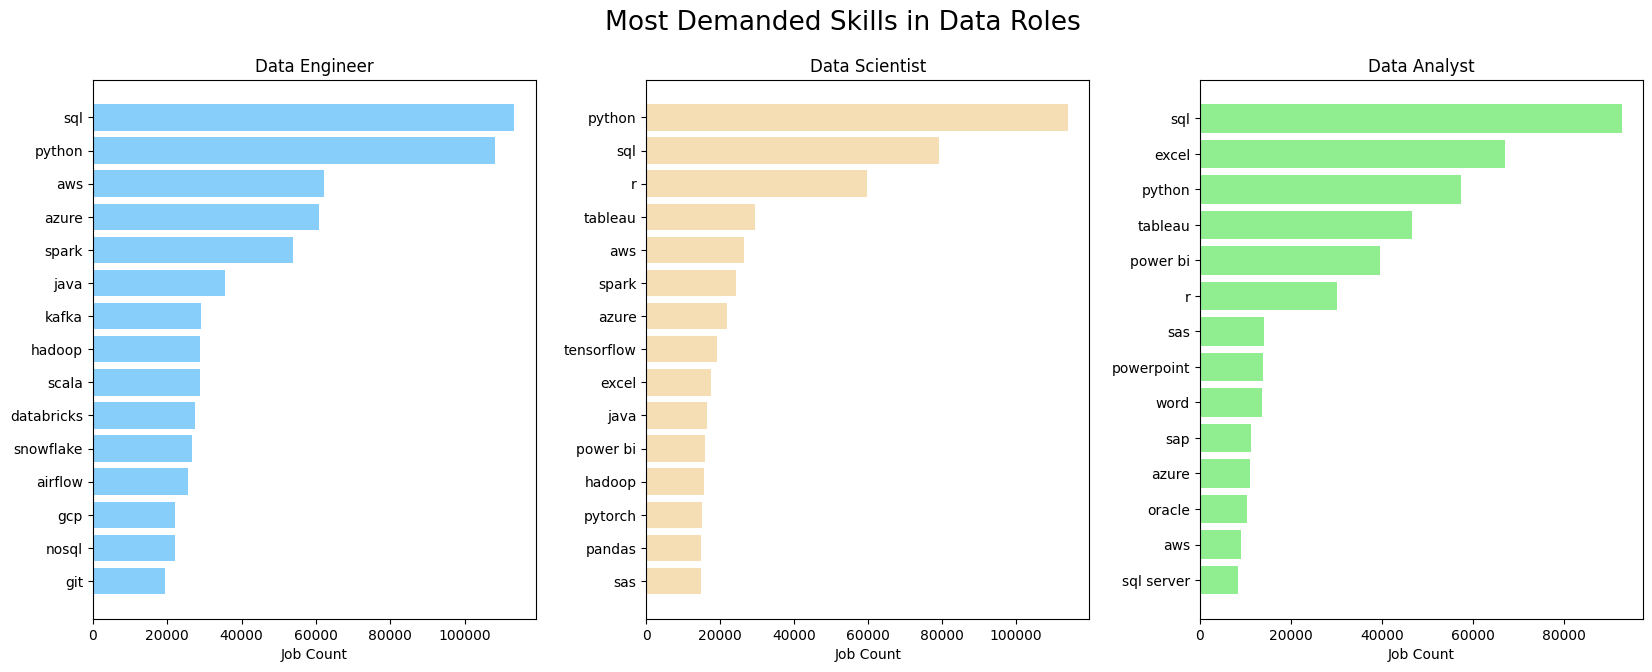

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
plt.subplots_adjust(wspace=0.25)  # adjusting the horizontal space between subplots
fig.suptitle('Most Demanded Skills in Data Roles', fontsize=19)

# plotting the data engineer job market by job count
axs[0].barh('skill_name', 'job_count', data=table_data_engineer_demand, color='lightskyblue')
axs[0].set_title('Data Engineer')
axs[0].set_xlabel('Job Count')

# plotting the data scientist job market by average salary
axs[1].barh('skill_name', 'job_count', data=table_data_scientist_demand, color='wheat')
axs[1].set_title('Data Scientist')
axs[1].set_xlabel('Job Count')

# plotting the data analyst job market by average salary
axs[2].barh('skill_name', 'job_count', data=table_data_analyst_demand, color='lightgreen')
axs[2].set_title('Data Analyst')
axs[2].set_xlabel('Job Count')

plt.show()


In [30]:
sql_file_path = 'queries/2_skill_comparison.sql'

In [51]:
queries = read_sql_file(sql_file_path)
connection = connect_to_database()

if connection:
    tables = execute_queries(connection, queries)
    connection.close()

All queries executed successfully!


In [60]:
# tables for skill salary
table_data_total_salary = tables[0]
table_data_engineer_salary = tables[1].sort_values('salary', ascending=True)
table_data_scientist_salary = tables[2].sort_values('salary', ascending=True)
table_data_analyst_salary = tables[3].sort_values('salary', ascending=True)

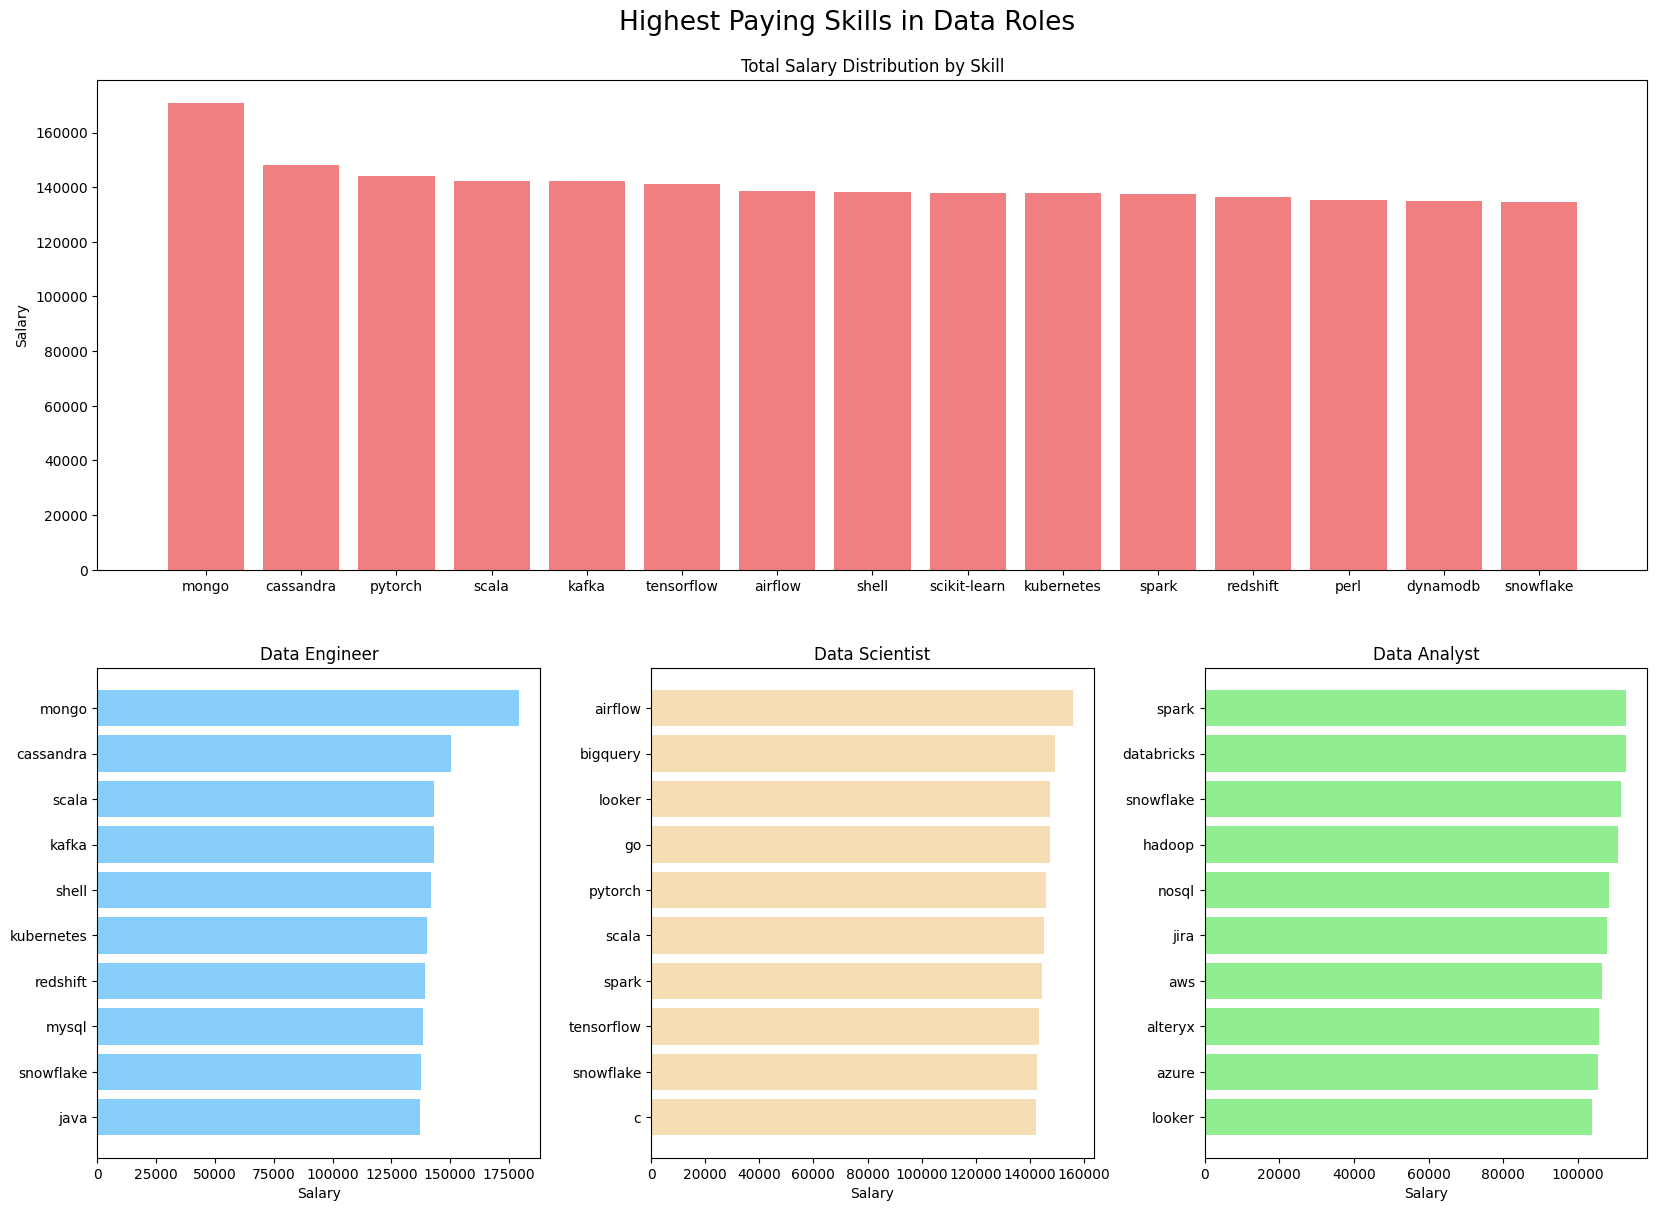

In [66]:

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))  # Changed nrows to 2
plt.subplots_adjust(wspace=0.25)  # adjusting the horizontal space between subplots
fig.suptitle('Highest Paying Skills in Data Roles', fontsize=19, y=0.930)

# Plotting the first wide total skill row
plt.subplot(2, 3, (1, 3))  # This specifies that the plot spans the first three columns
plt.bar('skill_name', 'salary', data=table_data_total_salary, color='lightcoral')
plt.ylabel('Salary')
plt.title('Total Salary Distribution by Skill')

# flatten and remove background subplots
ax_flatten = axs[0, :].flatten()  # Flatten the 2D array to access all subplots in the first row
ax_flatten[0].axis('off')
ax_flatten[1].axis('off')
ax_flatten[2].axis('off')

# plotting the data engineer job market by job count
axs[1, 0].barh('skill_name', 'salary', data=table_data_engineer_salary, color='lightskyblue')
axs[1, 0].set_title('Data Engineer')
axs[1, 0].set_xlabel('Salary')

# plotting the data scientist job market by average salary
axs[1, 1].barh('skill_name', 'salary', data=table_data_scientist_salary, color='wheat')
axs[1, 1].set_title('Data Scientist')
axs[1, 1].set_xlabel('Salary')

# plotting the data analyst job market by average salary
axs[1, 2].barh('skill_name', 'salary', data=table_data_analyst_salary, color='lightgreen')
axs[1, 2].set_title('Data Analyst')
axs[1, 2].set_xlabel('Salary')

plt.show()